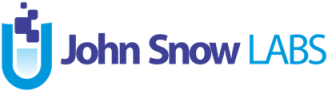

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlptest/blob/main/demo/tutorials/OpenAI_QA_Testing_Notebook.ipynb)

**nlptest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy or OpenAI** models, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification and Question Answering (QA) model using the library. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with nlptest on John Snow Labs

In [ ]:
!pip install nlptest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the nlptest library in the following way.

In [ ]:
#Import Harness from the nlptest library
from nlptest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (text-classification or ner)|
|**model**     |PipelineModel or path to a saved model or pretrained pipeline/model from hub.
|**data**       |Path to the data that is to be used for evaluation. Can be .csv or .conll file in the CoNLL format 
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.
|**hub**       |model hub to load from the path. Required if model param is passed as path.|

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

nlptest supports robustness tests for LLM testing for now.

### Set environment for OpenAI

In [3]:
import os
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

### Setup and Configure Harness

In [ ]:
harness = Harness(task="question-answering", hub="openai", model="gpt-3.5-turbo", data='BoolQ-test-tiny')

We have specified task as QA, hub as OpenAI and model as GPT-3.5.

For dataset we used BoolQ-test-tiny which includes 50 lines from BoolQ-test. Other available datasets are:

* `BoolQ-test-tiny`
* `BoolQ-test`
* `BoolQ-combined`
* `NQ-open-test`
* `NQ-open-combined`
* `NQ-open-test-tiny`



For tests we used lowercase and uppercase. Other available tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure({
    'model_parameters': {
      'max_tokens': 512
    },
    
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'model_parameters': {'user_prompt': "I've provided a question and context. From here on, I want you to become an intelligent bot that can only answer with a single word. The words you are capable of saying are True and False. If you think the answer to the question is True, then say 'True'. If it is False, then say 'False'. Do not say anything else other than that."},
 'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.


### Generating the test cases.

In [12]:
harness.generate()


Generating testcases... (robustness): 100%|██████████| 2/2 [00:00<00:00, 258.58it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [13]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...
...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS..."
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [14]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [04:07<00:00,  2.47s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [15]:
harness.generated_results()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...,True.,True,True
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...,True.,True.,True
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,False. Bullsnakes are not known to prey on dog...,False,True
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...,True.,True.,True
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...,True.,"True. If your ticket includes the code ""Manche...",True
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...,True.,True.,True
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...,True,True,True
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS...",False.,False,True
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...,False,False. The Isle of Wight is separate from Hamp...,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [16]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,0,50,100%,70%,True
1,robustness,uppercase,2,48,96%,70%,True


In [17]:
df = harness.generated_results()

In [18]:
df[df['pass']==False]

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
74,robustness,uppercase,are the winnipeg jets still in the stanley cup,"Winnipeg Jets -- In the 2017--18 season, the J...",ARE THE WINNIPEG JETS STILL IN THE STANLEY CUP,"WINNIPEG JETS -- IN THE 2017--18 SEASON, THE J...",False. The article does not mention the curren...,False. The information provided in the context...,False
92,robustness,uppercase,is there a sequel to batman year one,Batman: Year One -- Following Crisis on Infini...,IS THERE A SEQUEL TO BATMAN YEAR ONE,BATMAN: YEAR ONE -- FOLLOWING CRISIS ON INFINI...,False,True.,False


In [19]:
print(df.iloc[74]['expected_result'])
print(df.iloc[74]['actual_result'])

False. The article does not mention the current status of the Winnipeg Jets in the Stanley Cup.
False. The information provided in the context states that the Winnipeg Jets lost in the Western Conference Finals and did not advance to the Stanley Cup Finals.


#### NQ-open-test dataset testing

We can also use another dataset, NQ-open for testing the model.

In [ ]:
harness = Harness(task="question-answering", hub="openai", model="gpt-3.5-turbo", data='NQ-open-test-tiny')

In [ ]:
harness.configure({
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

In [ ]:
harness.generate()

Generating testcases... (robustness): 100%|██████████| 2/2 [00:00<00:00, 297.92it/s]


In [ ]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-
...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-


In [ ]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


In [ ]:
df = harness.generated_results()

In [ ]:
df

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-,Six geese a-laying.,"On the 6th day of Christmas, my true love sent...",True
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-,There are currently 11 5-star generals in the ...,There have been only nine five-star generals i...,True
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-,"In the book ""Sharp Objects"" by Gillian Flynn a...","Amma Crellin, Adora's daughter, killed both Na...",True
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-,"As of 2021, there are over 560 Costco location...","As of 2021, there are 559 Costco locations in ...",True
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-,Peter Cushing played Grand Moff Tarkin in the ...,Peter Cushing played Grand Moff Tarkin in the ...,True
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-,"As of August 2021, the Twitter account with th...","As of September 2021, the most followed person...",True
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-,President John F. Kennedy said the famous quot...,"The quote ""it's not what your country can do f...",True
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-,"Lil Wayne's new album ""Tha Carter V"" was relea...","Sorry, I am not capable of providing real-time...",False
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-,The Khajuraho temples are especially well know...,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,True


In [ ]:
df[df['pass']==False]

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
8,robustness,lowercase,when does the green book come out in theaters,-,when does the green book come out in theaters,-,"I am sorry, but I cannot provide an answer as ...","Unfortunately, as an AI language model, I am n...",False
9,robustness,lowercase,who signed the sugauli treaty on behalf of nepal,-,who signed the sugauli treaty on behalf of nepal,-,Nepal's representative Chandra Shekhar Upadhya...,Raj Guru Gajaraj Mishra and Colonel Mathabar S...,False
37,robustness,lowercase,who is the father of hope's baby on the bold a...,-,who is the father of hope's baby on the bold a...,-,The father of Hope's baby on The Bold and the ...,The father of Hope's baby on The Bold and the ...,False
40,robustness,lowercase,when does stranded deep come out for xbox,-,when does stranded deep come out for xbox,-,Stranded Deep was released for Xbox One on Oct...,Stranded Deep was released for Xbox One on Apr...,False
41,robustness,lowercase,when is the hundredth episode of the flash,-,when is the hundredth episode of the flash,-,The hundredth episode of The Flash aired on Ma...,The hundredth episode of The Flash aired on Ma...,False
45,robustness,lowercase,who has the most followers on the twitter,-,who has the most followers on the twitter,-,"As of 2021, the user with the most followers o...","As of May 2021, the person with the most follo...",False
58,robustness,uppercase,when does the green book come out in theaters,-,WHEN DOES THE GREEN BOOK COME OUT IN THEATERS,-,"Unfortunately, I cannot provide an accurate an...","I'm sorry, but I cannot provide an accurate an...",False
85,robustness,uppercase,who won worst cooks in america season 17,-,WHO WON WORST COOKS IN AMERICA SEASON 17,-,The winner of Worst Cooks in America season 17...,The winner of Worst Cooks in America Season 17...,False
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-,"Lil Wayne's new album ""Tha Carter V"" was relea...","Sorry, I am not capable of providing real-time...",False


In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,6,44,88%,70%,True
1,robustness,uppercase,3,47,94%,70%,True
